# Python Tips

## type

In [8]:
type((1, 0))

tuple

In [9]:
type(slice(1, 0))

slice

In [15]:
(2,None)

(2, None)

In [17]:
slice(1, None)

slice(1, None, None)

## operator 

operator モジュールは、Python の組み込み演算子に対応する効率的な関数群を提供    
例えば、 operator.add(x, y) は式 x+y と等価    
関数名は特殊メソッドを__を消して使える。

In [1]:
from operator import itemgetter
#演算対象からその __getitem__() メソッドを使って item を取得する呼び出し可能なオブジェクトを返し
# 二つ以上のアイテムを要求された場合には、アイテムのタプルを返します。

In [3]:
itemgetter(0)('ABCDEFG')

'A'

In [4]:
itemgetter(1)('ABCDEFG')

'B'

In [5]:
itemgetter(1,3,5)('ABCDEFG')

('B', 'D', 'F')

In [6]:
itemgetter(slice(2,None))('ABCDEFG')

'CDEFG'

In [ ]:
#f = itemgetter(2) とした後で、f(r) を呼び出すと r[2] を返す

In [18]:
f = itemgetter(2)

In [28]:
f("abcd")

'c'

In [30]:
f("abc")

'c'

In [10]:
from operator import concat

In [12]:
concat("a", "b")

'12'

In [13]:
from operator import add

In [14]:
add(1, 2)

3

# サイト訪問の分析

In [31]:
#The MineThatData E-Mail Analytics And Data Mining Challenge†4のデータセット
#過去 12 か月に購買履歴のある顧客に対して、ランダムに「男性向けメー ルを送る」「女性向けメールを送る」
#「メールを送らない」という3 種類の行動を実施し、その後、サイト 訪問に結びついたか、商品を買ったか、を調べたもの
import urllib.request
csv_url = "http://www.minethatdata.com/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv"
csv_filename = "source_data.csv"
with open(csv_filename, "w") as fp:
    data = urllib.request.urlopen(csv_url).read()
    fp.write(data.decode("ascii"))
    

In [32]:
import pandas as pd
source_df = pd.read_csv(csv_filename)
source_df.head(10)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0
5,6,2) $100 - $200,134.83,0,1,Surburban,0,Phone,Womens E-Mail,1,0,0.0
6,9,3) $200 - $350,280.20,1,0,Surburban,1,Phone,Womens E-Mail,0,0,0.0
7,9,1) $0 - $100,46.42,0,1,Urban,0,Phone,Womens E-Mail,0,0,0.0
8,9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0.0
9,10,1) $0 - $100,32.84,0,1,Urban,1,Web,Womens E-Mail,0,0,0.0


In [33]:
source_df.groupby(["mens","womens"]).count()


recency  history_segment  history  zip_code  newbie  channel  \
mens womens                                                                 
0    1         28734            28734    28734     28734   28734    28734   
1    0         28818            28818    28818     28818   28818    28818   
     1          6448             6448     6448      6448    6448     6448   

             segment  visit  conversion  spend  
mens womens                                     
0    1         28734  28734       28734  28734  
1    0         28818  28818       28818  28818  
     1          6448   6448        6448   6448

In [34]:
#「男性向けのメールを送るか、女性向けのメールを送るか」という問題として扱うため、
#「メー ルを送らない」という実験をしたデータを捨てます。
mailed_df = source_df[source_df["segment"] != "No E-Mail"]
mailed_df = mailed_df.reset_index(drop=True)
mailed_df.head(10)


,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
2,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
3,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0
4,6,2) $100 - $200,134.83,0,1,Surburban,0,Phone,Womens E-Mail,1,0,0.0
5,9,3) $200 - $350,280.20,1,0,Surburban,1,Phone,Womens E-Mail,0,0,0.0
6,9,1) $0 - $100,46.42,0,1,Urban,0,Phone,Womens E-Mail,0,0,0.0
7,9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0.0
8,10,1) $0 - $100,32.84,0,1,Urban,1,Web,Womens E-Mail,0,0,0.0
9,7,5) $500 - $750,548.91,0,1,Urban,1,Phone,Womens E-Mail,1,0,0.0


In [35]:
#zip_codeと channelはカテゴリー変数なので、ダミー変数に展開して、特徴ベクトル作成
dummied_df = pd.get_dummies(mailed_df[["zip_code", "channel"]], drop_first=True) #get_dummiesでダミーデータに展開
feature_vector_df = mailed_df.drop(["history_segment", "zip_code", "channel", "segment", "visit", "conversion", "spend"], axis=1)
feature_vector_df = feature_vector_df.join(dummied_df) #dfをjoinして結合
feature_vector_df.head(10)

,recency,history,mens,womens,newbie,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,10,142.44,1,0,0,1,0,1,0
1,7,180.65,0,1,1,1,0,0,1
2,9,675.83,1,0,1,0,0,0,1
3,2,45.34,1,0,0,0,1,0,1
4,6,134.83,0,1,0,1,0,1,0
5,9,280.20,1,0,1,1,0,1,0
6,9,46.42,0,1,0,0,1,1,0
7,9,675.07,1,1,1,0,0,1,0
8,10,32.84,0,1,1,0,1,0,1
9,7,548.91,0,1,1,0,1,1,0


In [36]:
from sklearn.model_selection import train_test_split

is_treat_list = list(mailed_df["segment"] == "Mens E-Mail")
is_cv_list = list(mailed_df["visit"] == 1)
#3つを学習とテストに分ける
train_is_cv_list, test_is_cv_list, train_is_treat_list, test_is_treat_list, train_feature_vector_df, test_feature_vector_df = train_test_split(is_cv_list, is_treat_list, feature_vector_df, test_size=0.5,  random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

treat_model = LogisticRegression(C=0.01)
control_model = LogisticRegression(C=0.01)

train_sample_num = len(train_is_cv_list)

#実験群
treat_is_cv_list = [train_is_cv_list[i] for i in range(train_sample_num) if train_is_treat_list[i] == True]
treat_feature_vector_list = train_feature_vector_df[train_is_treat_list]
#統制群
control_is_cv_list = [train_is_cv_list[i] for i in range(train_sample_num) if train_is_treat_list[i] == False]
control_feature_vector_list = train_feature_vector_df[list(map(lambda a:a == False ,train_is_treat_list))]

treat_model.fit(treat_feature_vector_list, treat_is_cv_list)
control_model.fit(control_feature_vector_list, control_is_cv_list)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
from operator import itemgetter
    
treat_score = treat_model.predict_proba(test_feature_vector_df)
control_score = control_model.predict_proba(test_feature_vector_df)
score_list = treat_score[:,1] / control_score[:,1]

result = list(zip(test_is_cv_list, test_is_treat_list, score_list))
result.sort(key=itemgetter(2),reverse=True)
    

treat_uu = 0
control_uu = 0
treat_cv = 0
control_cv = 0
treat_cvr = 0.0
control_cvr = 0.0
lift = 0.0

stat_data = []

for is_cv, is_treat, score in result:
    if is_treat:
        treat_uu += 1
        if is_cv:
            treat_cv += 1
        treat_cvr = treat_cv / treat_uu
    else:
        control_uu += 1
        if is_cv:
            control_cv += 1
        control_cvr = control_cv / control_uu

    # コンバージョンレートの差に実験群の人数を掛けることでliftを算出
    lift = (treat_cvr - control_cvr) * treat_uu

    stat_data.append([is_cv, is_treat, score, treat_uu, control_uu, treat_cv, control_cv, treat_cvr, control_cvr, lift])




Text(0,0.5,'conversion rate')

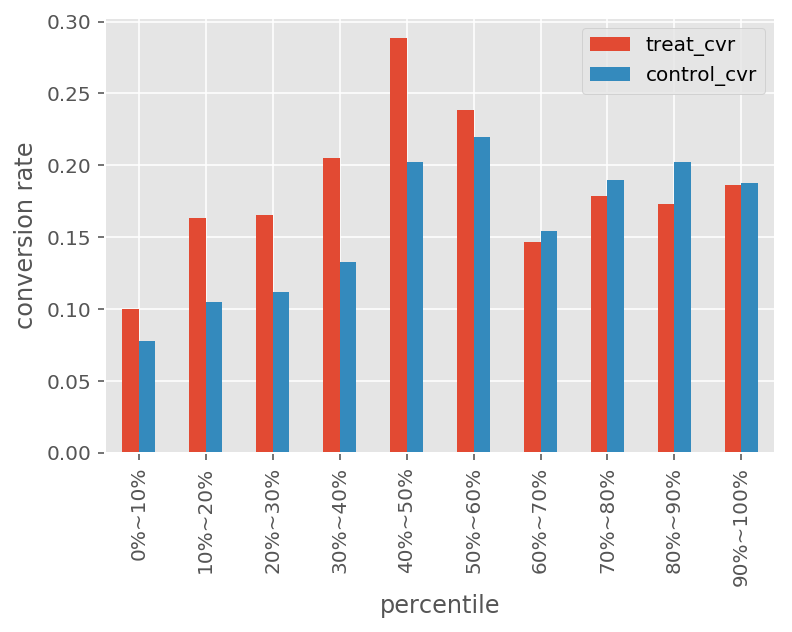

In [39]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 
%config InlineBackend.figure_formats = {'png', 'retina'}

qdf = pd.DataFrame(columns=('treat_cvr', 'control_cvr'))

quantile_data = []
for n in range(10):
    start = int(n * len(result) / 10)
    end = int((n + 1) * len(result) / 10) - 1
    quantiled_result = result[start:end]
    
    treat_uu = list(map(lambda item:item[1], quantiled_result)).count(True)
    control_uu = list(map(lambda item:item[1], quantiled_result)).count(False)
    
    treat_cv = [item[0] for item in quantiled_result if item[1] == True].count(True)
    control_cv = [item[0] for item in quantiled_result if item[1] == False].count(True)
    
    treat_cvr = treat_cv / treat_uu
    control_cvr = control_cv / control_uu
    
    
    quantile_data.append([treat_uu, control_uu, treat_cv, control_cv, treat_cvr, control_cvr])
        
    label = "{}%~{}%".format(n*10, (n+1)*10)
    qdf.loc[label] = [treat_cvr, control_cvr]

qdf.plot.bar()
plt.xlabel("percentile")
plt.ylabel("conversion rate")


図：10 パーセンタイルごとにコンバージョン率を可視化

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'conversion count')

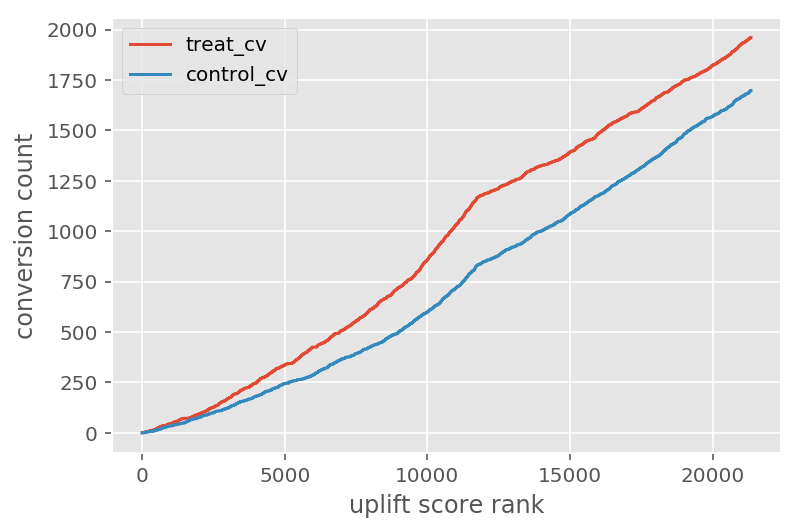

In [40]:
df = pd.DataFrame(stat_data)
df.columns = ["is_cv", "is_treat", "score", "treat_uu", "control_uu", "treat_cv", "control_cv", "treat_cvr", "control_cvr", "lift"]


# ベースラインを書き加える
df["base_line"] = df.index * df["lift"][len(df.index) - 1] / len(df.index)

df.plot(y=["treat_cv", "control_cv"])
plt.xlabel("uplift score rank")
plt.ylabel("conversion count")


図：コンバージョン件数の比較

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'conversion rate')

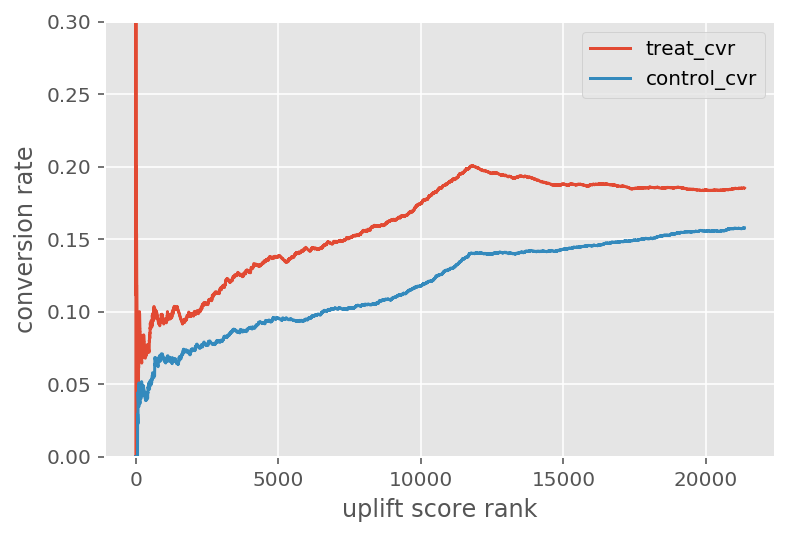

In [41]:
df.plot(y=["treat_cvr", "control_cvr"], ylim=[0, 0.3])
plt.xlabel("uplift score rank")
plt.ylabel("conversion rate")


図：コンバージョンレートの比較

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'lift count')

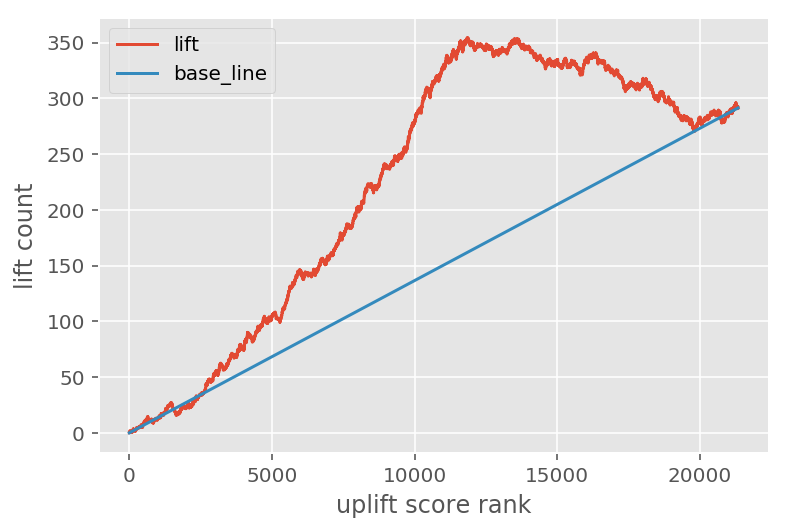

In [42]:

df.plot(y=["lift", "base_line"])
plt.xlabel("uplift score rank")
plt.ylabel("lift count")


図：コンバージョン上昇件数を可視化

10 パーセンタイルごとのコンバージョンレートの比較図から、スコア上位 60% のセグメントでは男性向けメールが女性向けメールよりもよく反応してる。下位 40% は女性 向けメールのほうが反応率がわずかに良い。

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


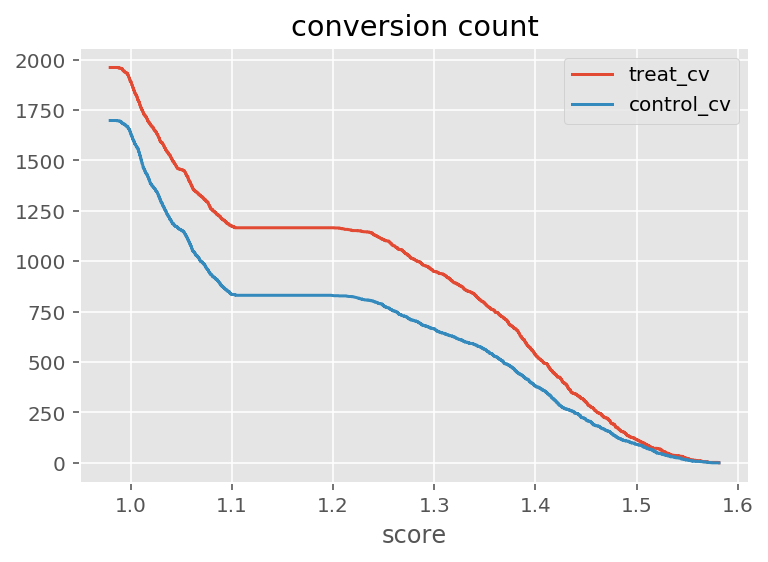

In [44]:

df.plot(y=["treat_cv", "control_cv"], x="score", title="conversion count")


/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


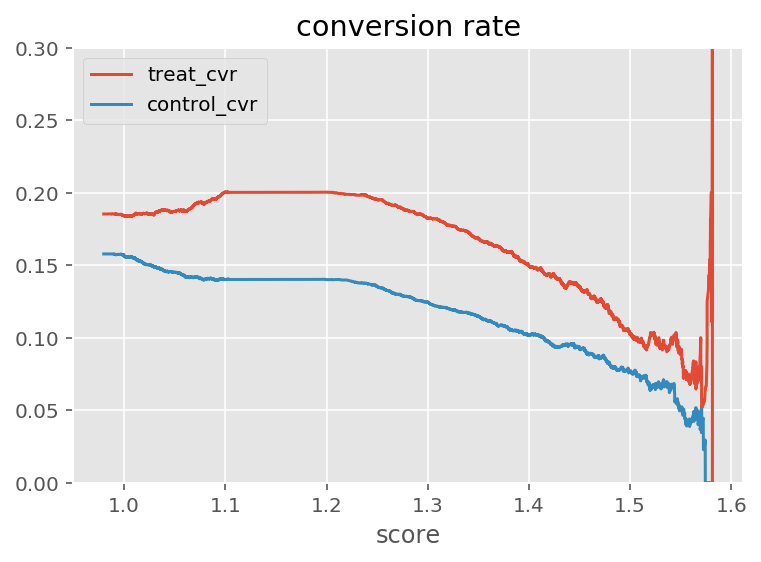

In [45]:
df.plot(y=["treat_cvr", "control_cvr"], ylim=[0, 0.3], x="score", title="conversion rate")


/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


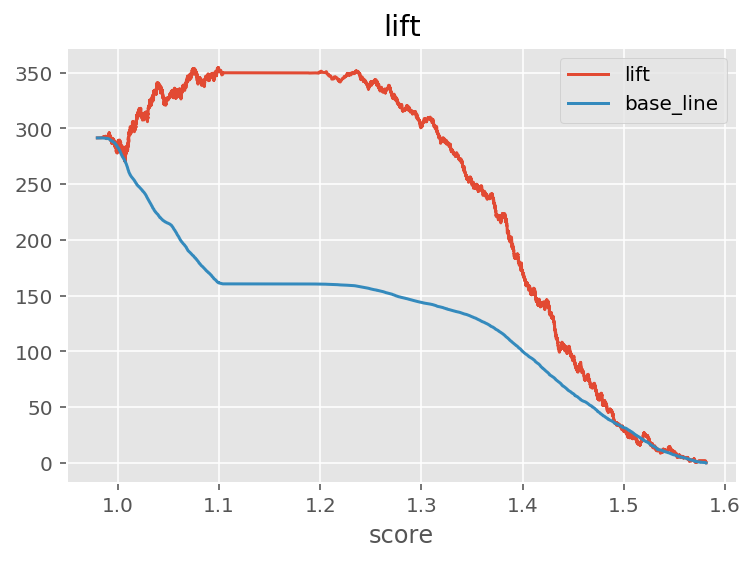

In [46]:
df.plot(y=["lift", "base_line"], x="score", title="lift")